In [160]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
infer_res = pd.read_csv('./data/infer.tsv', sep='\t')

In [162]:
classes_cnt = infer_res.groupby('gt').count().to_numpy()[:, 0]
classes_cnt = list(classes_cnt)

In [163]:
infer_labels = infer_res['infer'].tolist()
real_labels = infer_res['gt'].tolist()

In [164]:
confusion_mat = confusion_matrix(real_labels, infer_labels)
confusion_mat = confusion_mat.tolist()
confusion_mat

[[120, 2, 3, 81, 20, 21, 273],
 [11, 18, 1, 11, 4, 1, 30],
 [5, 2, 22, 12, 5, 2, 29],
 [30, 1, 2, 1192, 14, 34, 330],
 [14, 0, 1, 71, 80, 11, 82],
 [15, 1, 2, 80, 8, 192, 151],
 [43, 2, 2, 300, 16, 98, 1145]]

In [165]:
for i in range(7):
    confusion_mat[i] = list(confusion_mat[i]) / classes_cnt[i]

In [166]:
confusion_mat

[array([0.23076923, 0.00384615, 0.00576923, 0.15576923, 0.03846154,
        0.04038462, 0.525     ]),
 array([0.14473684, 0.23684211, 0.01315789, 0.14473684, 0.05263158,
        0.01315789, 0.39473684]),
 array([0.06493506, 0.02597403, 0.28571429, 0.15584416, 0.06493506,
        0.02597403, 0.37662338]),
 array([1.87149095e-02, 6.23830318e-04, 1.24766064e-03, 7.43605739e-01,
        8.73362445e-03, 2.12102308e-02, 2.05864005e-01]),
 array([0.05405405, 0.        , 0.003861  , 0.27413127, 0.30888031,
        0.04247104, 0.31660232]),
 array([0.03340757, 0.00222717, 0.00445434, 0.17817372, 0.01781737,
        0.42761693, 0.3363029 ]),
 array([0.0267746 , 0.00124533, 0.00124533, 0.1867995 , 0.00996264,
        0.06102117, 0.71295143])]

In [167]:
labels = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']

In [168]:
confusion_matrix_df = pd.DataFrame(confusion_mat, index=labels, columns=labels)

In [169]:
confusion_matrix_df

,anger,disgust,fear,joy,sadness,surprise,neutral
anger,0.230769,0.003846,0.005769,0.155769,0.038462,0.040385,0.525000
disgust,0.144737,0.236842,0.013158,0.144737,0.052632,0.013158,0.394737
fear,0.064935,0.025974,0.285714,0.155844,0.064935,0.025974,0.376623
joy,0.018715,0.000624,0.001248,0.743606,0.008734,0.021210,0.205864
sadness,0.054054,0.000000,0.003861,0.274131,0.308880,0.042471,0.316602
surprise,0.033408,0.002227,0.004454,0.178174,0.017817,0.427617,0.336303
neutral,0.026775,0.001245,0.001245,0.186800,0.009963,0.061021,0.712951


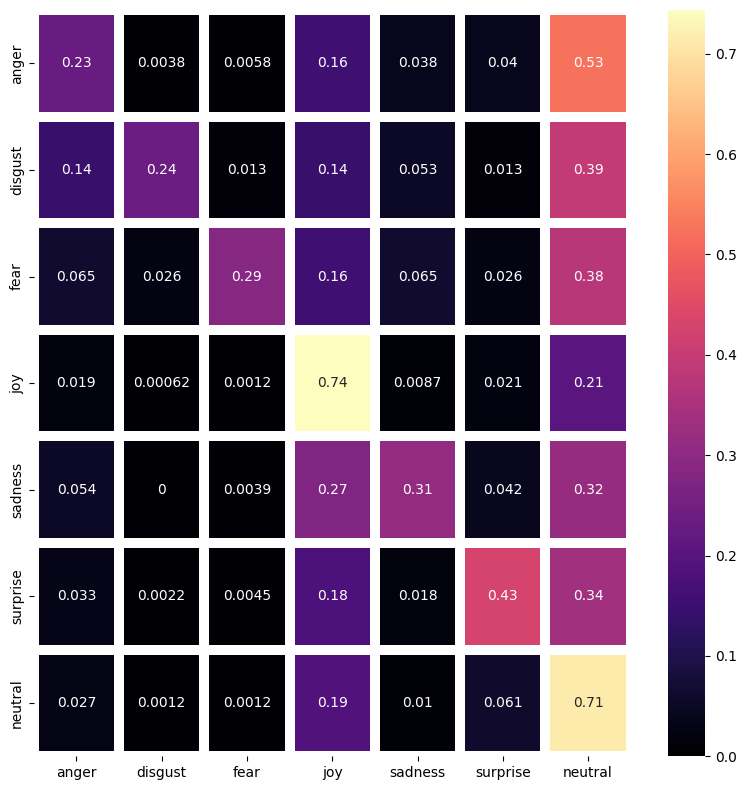

In [170]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(confusion_matrix_df, xticklabels=confusion_matrix_df.corr().columns, 
                     yticklabels=confusion_matrix_df.corr().columns, cmap='magma',
                     linewidths=6, annot=True)

plt.tight_layout()
plt.savefig('images/linear.png', dpi=800) 
